In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [4]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


In [5]:
path='/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
df= pd.read_csv(path)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [8]:
#removing unwanted spaces infront of the column names
df.columns=df.columns.str.strip()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225745 non-null  int64  
 1   Flow Duration                225745 non-null  int64  
 2   Total Fwd Packets            225745 non-null  int64  
 3   Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets  225745 non-null  int64  
 5   Total Length of Bwd Packets  225745 non-null  int64  
 6   Fwd Packet Length Max        225745 non-null  int64  
 7   Fwd Packet Length Min        225745 non-null  int64  
 8   Fwd Packet Length Mean       225745 non-null  float64
 9   Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max        225745 non-null  int64  
 11  Bwd Packet Length Min        225745 non-null  int64  
 12  Bwd Packet Length Mean       225745 non-null  float64
 13 

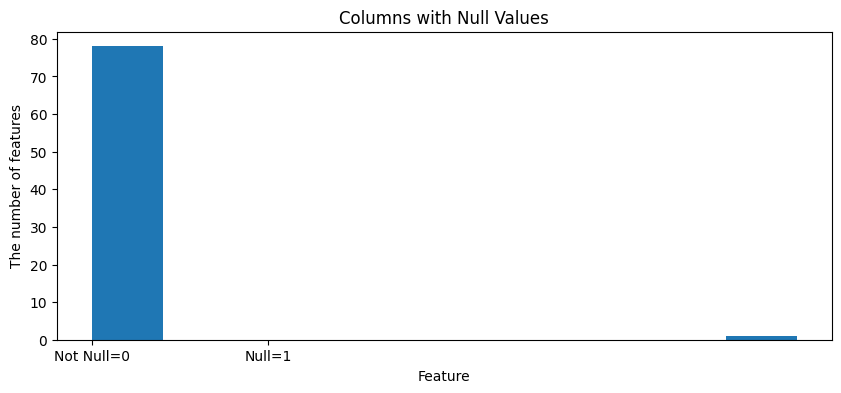

In [10]:
#Checking for null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())

plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

plt.show()


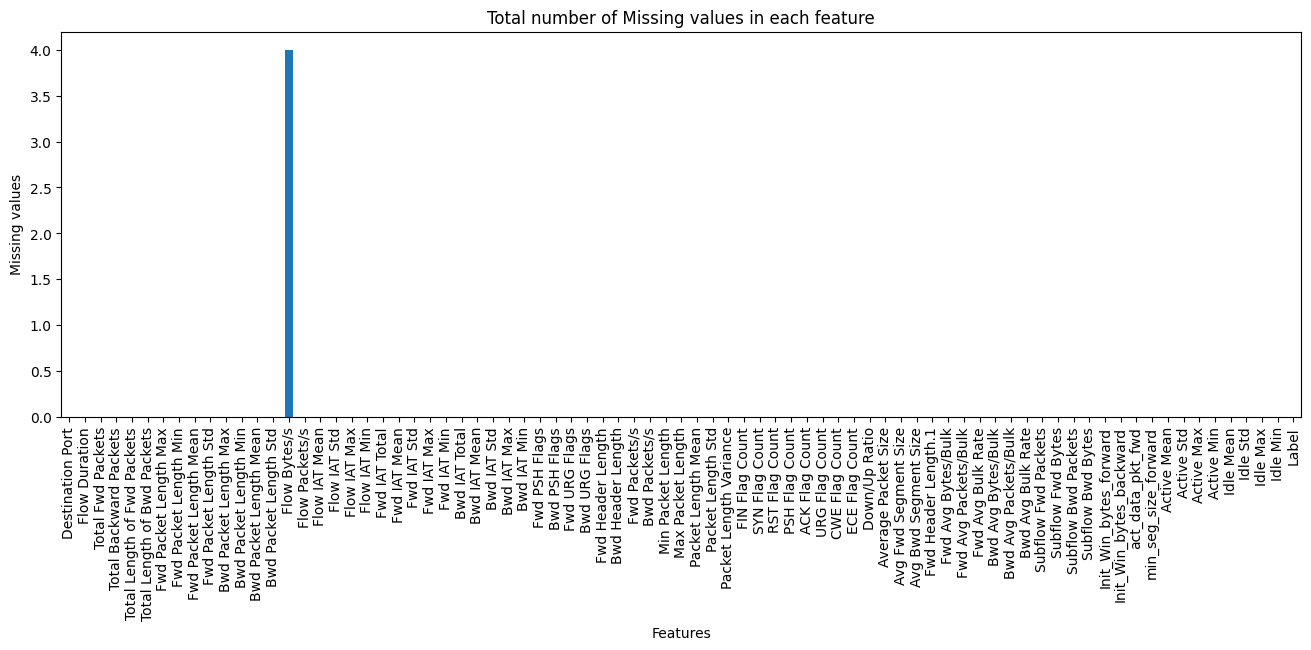

In [11]:
  #checking for the feature with null values
missing_values = df.isnull().sum()
fig = plt.figure(figsize=(16, 5))
missing_values.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Missing values")
plt.title("Total number of Missing values in each feature")
plt.show()

In [12]:
#removing all the entries with null values
df=df.dropna()

In [13]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=df.isnull().sum()  # Check for NaN values

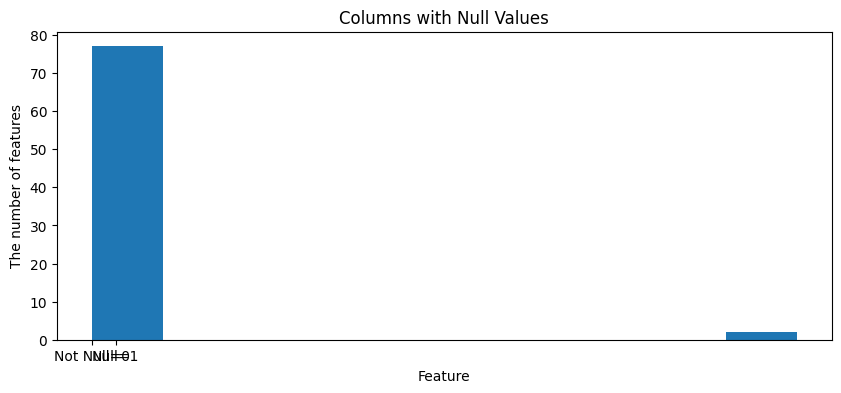

In [15]:
#Checking for new null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( null_values)

plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

plt.show()


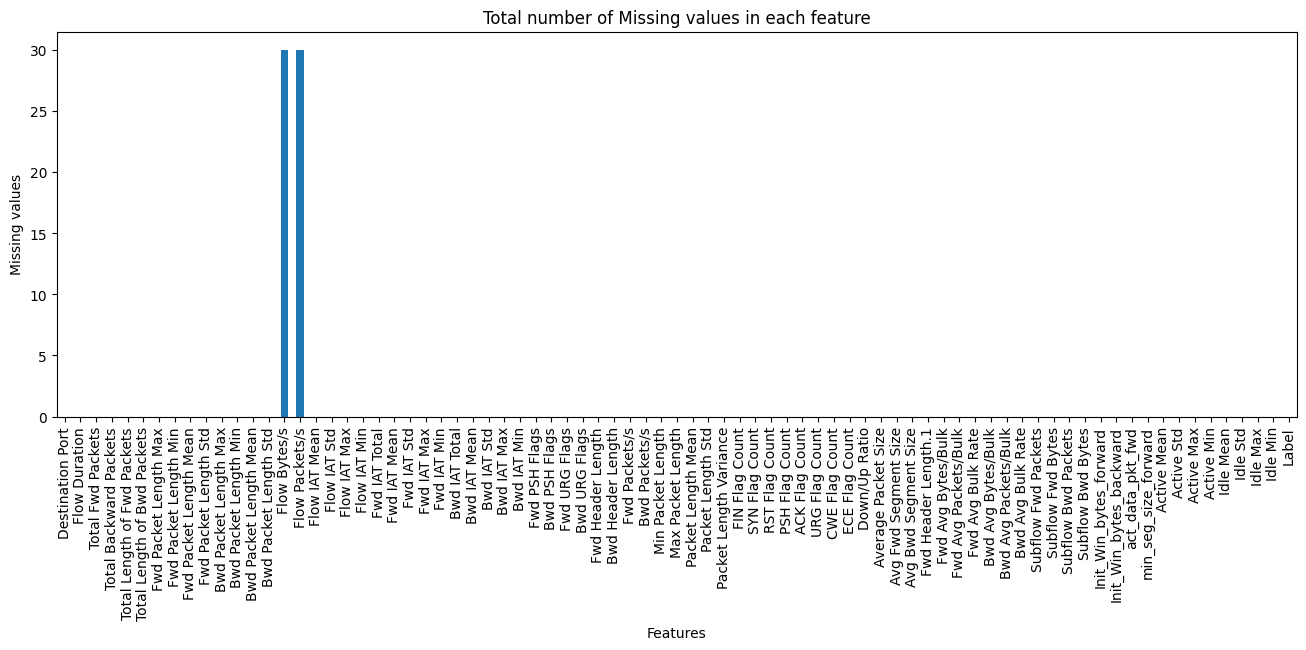

In [16]:
#checking for the feature with null values
missing_values = null_values
fig = plt.figure(figsize=(16, 5))
missing_values.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Missing values")
plt.title("Total number of Missing values in each feature")
plt.show()

In [17]:
#dropping all the new null values
df=df.dropna()

In [18]:
df['Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [19]:
# Converting the labels in the DataFrame to numerical values

df['Label'] = df['Label'].map({'BENIGN': 0, 'DDoS': 1})

In [20]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225744,61326,68,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [22]:
# Split data into features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# **RANDOM FOREST**


In [23]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [25]:
rf_pred = rf_model.predict(X_test)

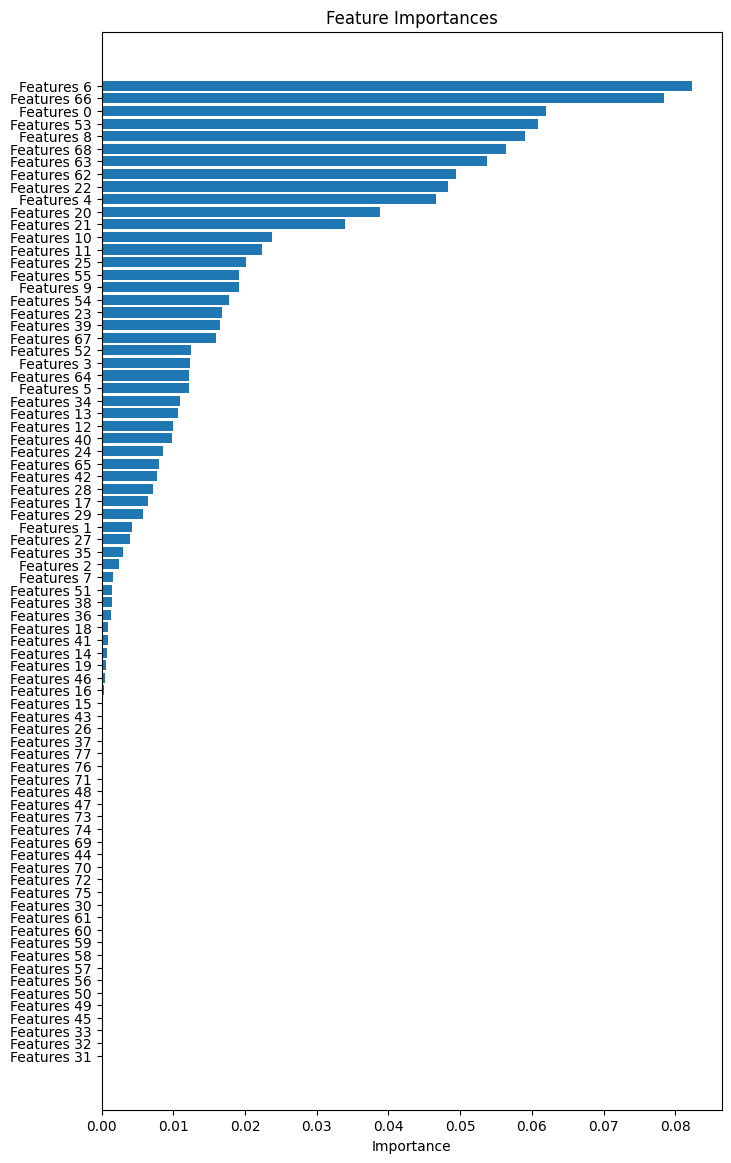

In [28]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

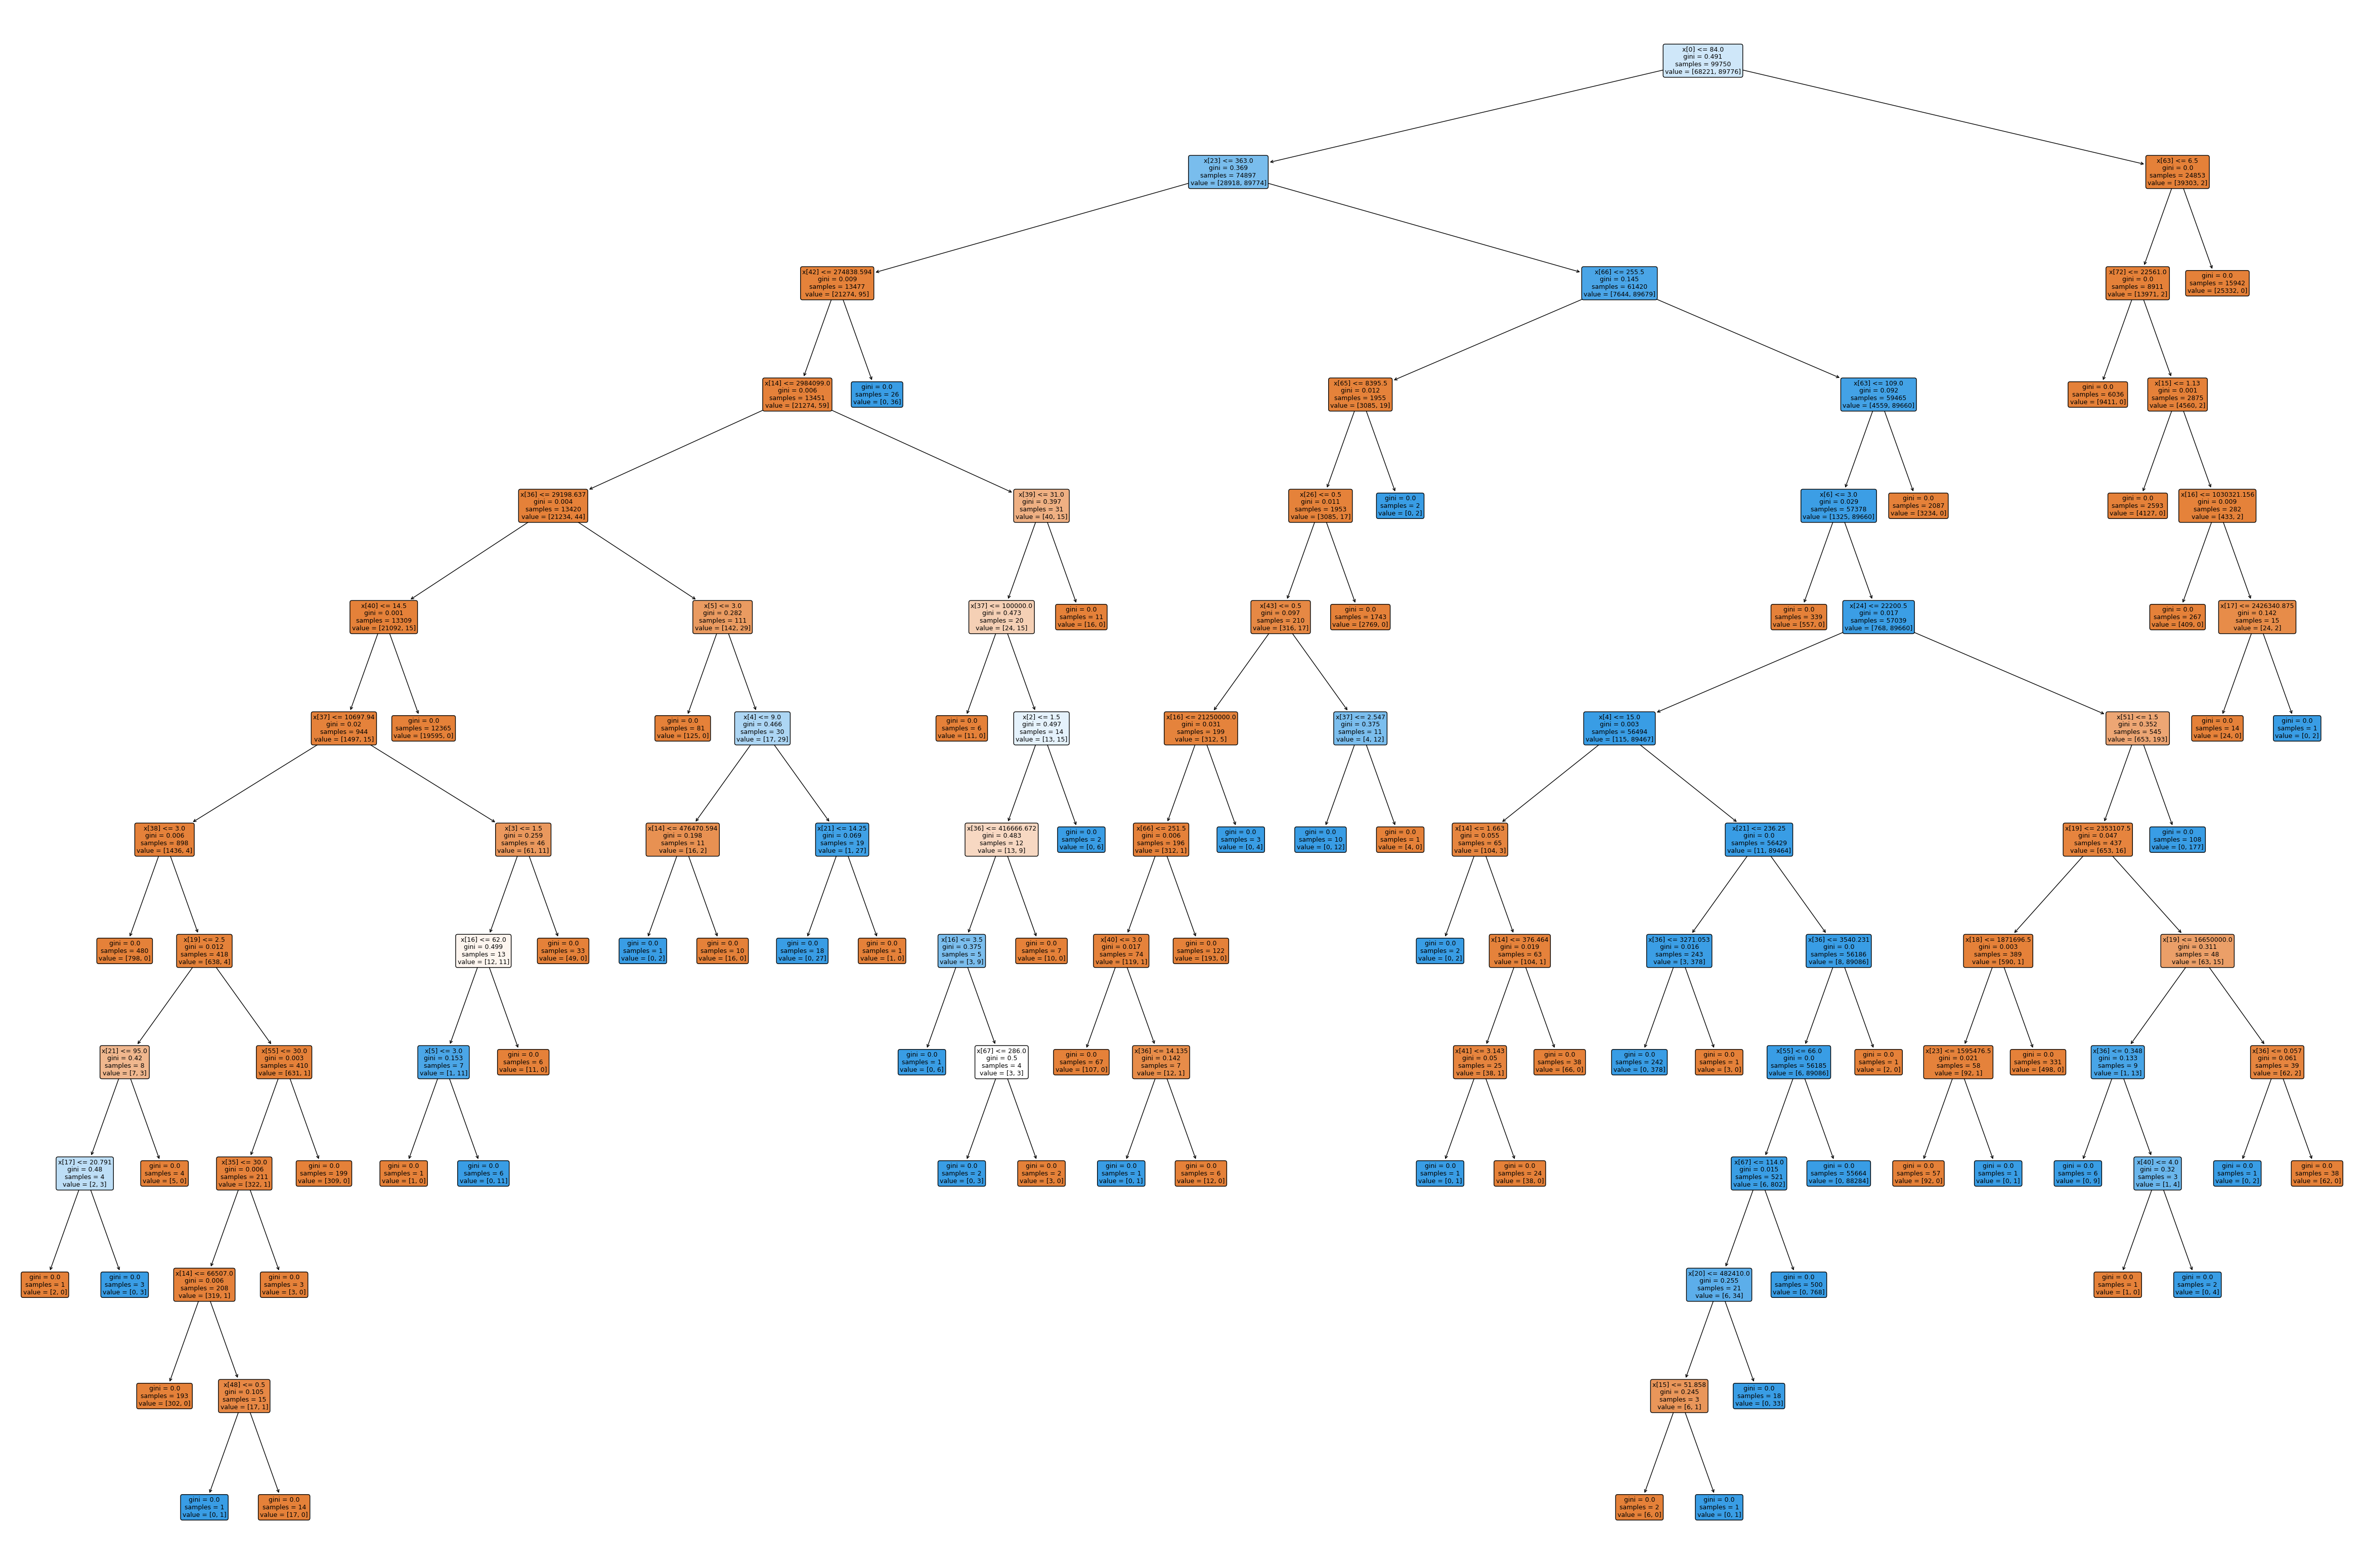

In [29]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(60, 40))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

#RANDOM FOREST EVALUATION

---




In [30]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [31]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9999
F1 Score: 0.9999
Precision: 1.0000
Recall: 0.9998


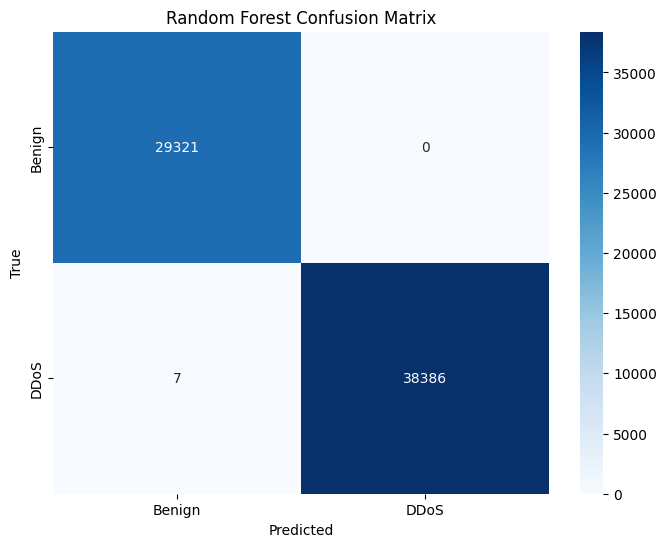

In [32]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

#**NEURAL NETWORK**

In [33]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9807
F1 Score: 0.9830
Precision: 0.9855
Recall: 0.9804


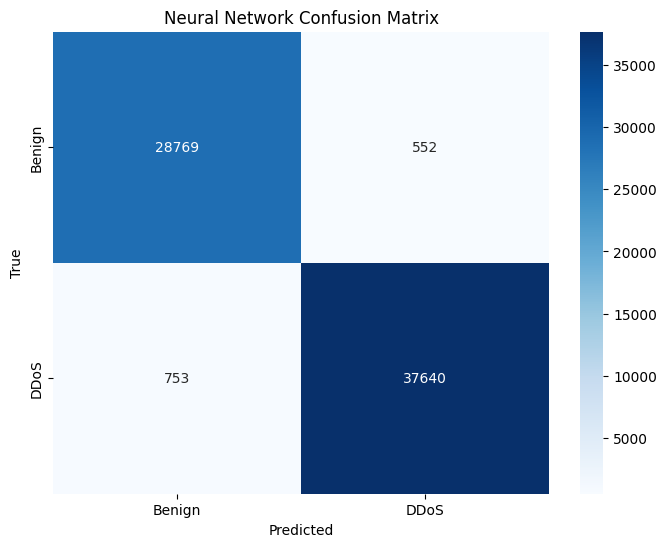

In [35]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

#**LOGISTIC REGRESSION**

In [36]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#**EVALUATION**

In [37]:

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

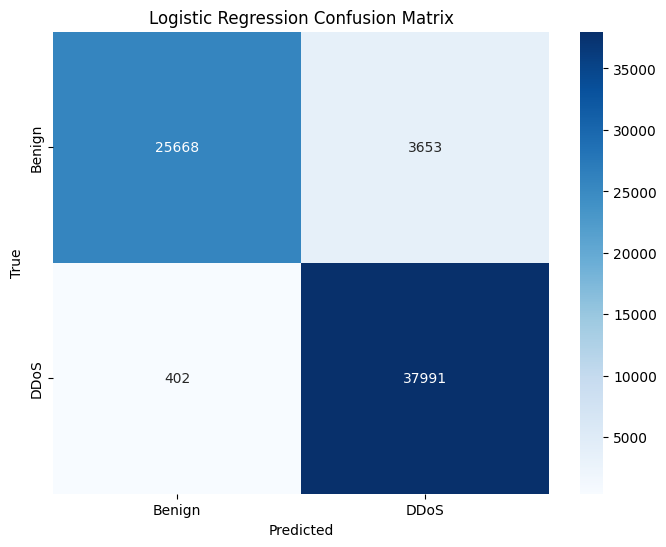

In [38]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')


In [39]:
print('\nLogistic Regression:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression:
Accuracy: 0.9401
F1 Score: 0.9493
Precision: 0.9123
Recall: 0.9895
